### 암 예측하기

In [1]:
import numpy
import pandas as pd
from statsmodels.formula.api import logit

In [35]:
#이미지 삽입
from IPython.display import Image

In [5]:
df=pd.read_excel('data/cancer.xlsx')
df.head()

,diagnosis,texture_mean,smoothness_mean,concave_points_mean,symmetry_mean,perimeter_se,compactness_se,concavity_se,concave_points_se,area_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,0.11840,0.14710,0.2419,8.589,0.04904,0.05373,0.01587,2019.0,0.1622,0.4601,0.11890
1,M,17.77,0.08474,0.07017,0.1812,3.398,0.01308,0.01860,0.01340,1956.0,0.1238,0.2750,0.08902
2,M,21.25,0.10960,0.12790,0.2069,4.585,0.04006,0.03832,0.02058,1709.0,0.1444,0.3613,0.08758
3,M,20.38,0.14250,0.10520,0.2597,3.445,0.07458,0.05661,0.01867,567.7,0.2098,0.6638,0.17300
4,M,14.34,0.10030,0.10430,0.1809,5.438,0.02461,0.05688,0.01885,1575.0,0.1374,0.2364,0.07678


In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# 종속변수 더미코딩 해주기
df['dn'] = df['diagnosis'].map({'M': 1, 'B': 0})

### 모형 1
- 독립변수: area_worst, smoothness_worst, symmetry_worst, fractal_dimension_worst
- 종속변수: diagnosis

In [27]:
res=logit('dn ~ area_worst + smoothness_worst + symmetry_worst + fractal_dimension_worst', df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.112036
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     dn   No. Observations:                  569
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Oct 2020   Pseudo R-squ.:                  0.8303
Time:                        12:32:54   Log-Likelihood:                -63.749
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.019e-133
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -26.2311      3.150     -8.327      0.000     -32.405     -20.057
area_worst                  0.0147      0.002      8.244      0.000       0.011       0.018
smoothness_worst           68.3573     16.590      4.120      0.000      35.842     100.873
symmetry_worst             10.6379      4.559      2.334      0.020       1.703      19.573
fractal_dimension_worst    17.9945     19.247      0.935      0.350     -19.728      55.717
===========================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 문제 풀기

Q1. area_worst 의 기울기는? 
> 0.0147

Q2. 위 모형1의 정확도는 얼마입니까? 
> 95%

Q3. 위 모형1의 정밀도는 얼마입니까? 
> 96%

Q4. 위 모형1의 재현도는 얼마입니까? 
> 92%

Q5. fractal_dimension_worst을 제외한 모형2와 비교했을 때 어떤 모형이 로그우도가 높습니까? 
> 모형1

Q6. 모형1과 모형2를 비교할 때 어떤 모형이 더 나은 모형이라고 할 수 있습니까? 
> 모형2

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [18]:
# 로지스틱 회귀 모델로 예측한 값과 실제 값을 넣어서 혼돈 행렬 만들기
# 문턱값(threshold) = 0.5 라고 설정
predict=res.predict(df)

# 예측한 값이 0.5 보다 크면 1(암 맞음), 아니면 0(암 아님)
prediction = numpy.where(predict > 0.5,1,0)
confusion_matrix(df['dn'],prediction)

array([[349,   8],
       [ 16, 196]])

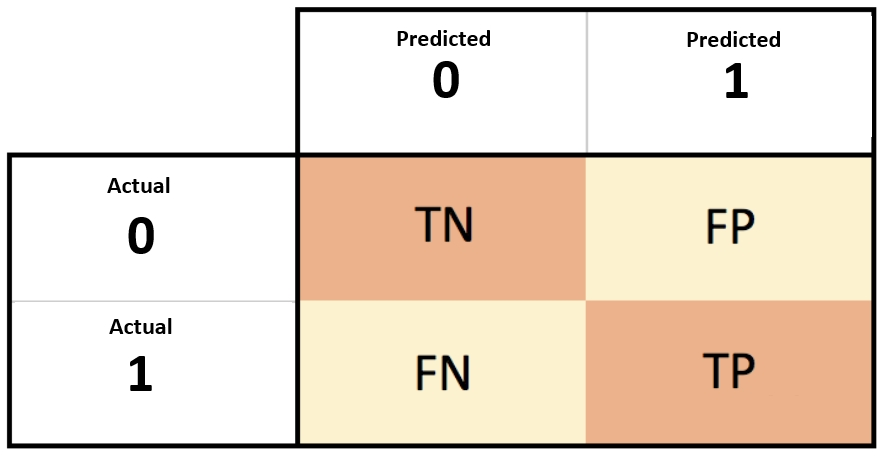

In [36]:
Image("https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg")

[예측,실제]

- TN (True Negative) [False, False] (정답)
- FN (False Negative) [False, True] (오답)
- FP (False Positive) [True, False] (오답)
- TP (True Posivie) [True, True] (정답)

In [43]:
TN,FP,FN,TP=confusion_matrix(df['dn'],prediction).ravel()
print(TN,FP,FN,TP)

349 8 16 196


### 정확도 (Accuracy) 
- (TN + TP) / (TN + FN + FP + TP)

In [44]:
# 직접 계산
print((TN + TP) / (TN +FN +FP +TP))
# 함수 계산
print(accuracy_score(df['dn'],prediction))

0.9578207381370826
0.9578207381370826


### 정밀도 (Precision)
- TP / (TP +FP)

In [45]:
# 직접 계산
print(TP /(TP+FP))
# 함수 계산
print(precision_score(df['dn'],prediction))

0.9607843137254902
0.9607843137254902


### 재현도 (Recall) 
- TP / (TP + FN)

In [47]:
# 직접 계산
print(TP / (TP+FN))
# 함수 계산
print(recall_score(df['dn'],prediction))

0.9245283018867925
0.9245283018867925


### 모형2
- 독립변수: area_worst, smoothness_worst, symmetry_worst
- 종속변수: diagnosis

In [24]:
res2=logit('dn ~ area_worst + smoothness_worst + symmetry_worst ', df).fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.112809
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     dn   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Oct 2020   Pseudo R-squ.:                  0.8292
Time:                        12:32:09   Log-Likelihood:                -64.189
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.008e-134
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -26.4085      3.145     -8.398      0.000     -32.572     -20.245
area_worst           0.0148      0.002      8.272      0.000       0.011       0.018
smoothness_worst    76.7460     14.452      5.311      0.000      48.421     105.071
symmetry_worst      12.3211      4.223      2.918      0.004       4.044      20.598
====================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- 모형 1의 로그우도: -63
- 모형 2의 로그우도: -64

*로그우도: log-likelihood

### 로그우도 비교

In [28]:
print(res.llf)
print(res2.llf)

-63.748661223724966
-64.18856127457728


### AIC, BIC 비교 (적합한 모형 찾기)

In [30]:
# aic 모형2가 더작음
print(res.aic)
print(res2.aic)

137.49732244744993
136.37712254915456


In [33]:
# bic 모형2가 더작음
print(res.bic)
print(res2.bic)

159.21672461808157
153.7526442856599


무조건 복잡한 모형이 로그우도가 높기 때문에, 로그우도가 높은 모형을 고르면 새로운 데이터에 대해서는 맞추지 못할 수 있어서
보정된 모형을 사용함 (AIC, BIC)

기존 데이터에 대해서는 모형1이 잘한다고 볼수있지만, 새로운 데이터에 대해서는 모형2가 좋음
